In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Cancer Data

In [8]:
# load cancer data
cancer = load_breast_cancer();
cancer.keys()
feature_names = cancer["feature_names"]; #column name
target_names = cancer["target_names"];   #cluster classes
data = cancer['data'];
sampleSize = 5;
cancerDF = pd.DataFrame(data[:sampleSize],columns=feature_names,index=target_names[cancer["target"][:sampleSize]]);
cancerDF  # don't add semi-colon here

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


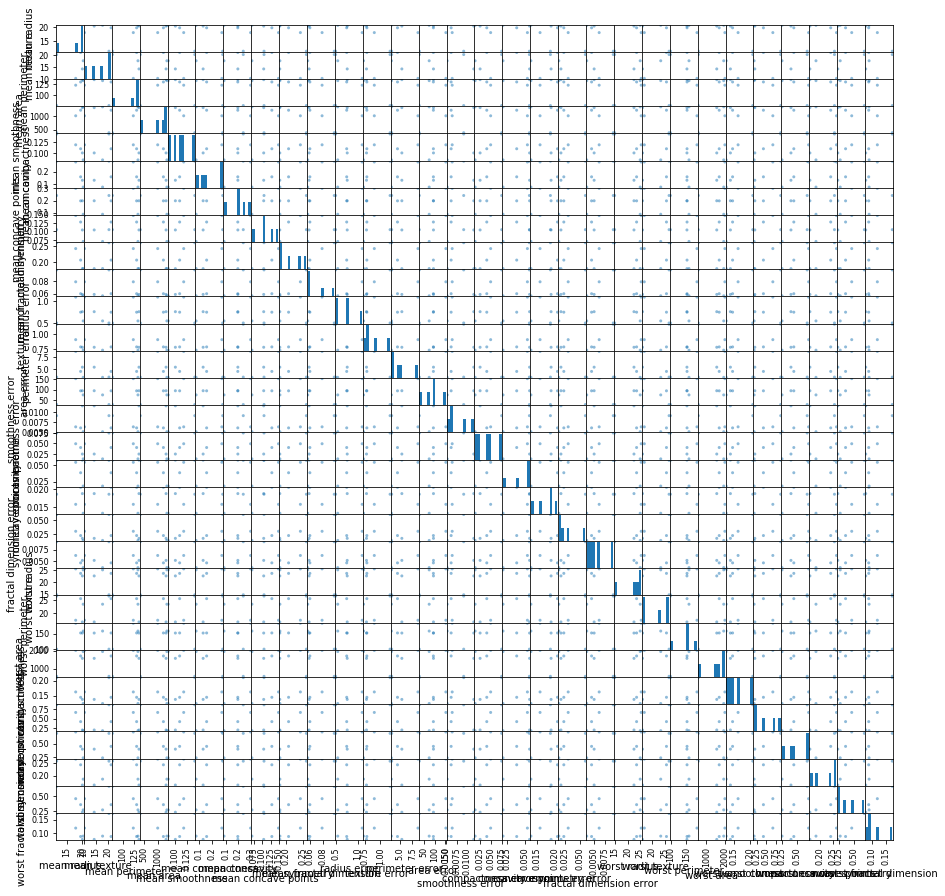

In [12]:
#scatter matrix to visualize the data unformity
#pending color array
pd.plotting.scatter_matrix(cancerDF,figsize=(15,15)); 
#its difficult to visualize and analyze the data. becuase features more 
#In next step we select the important features and draw the cluster of cancer possiblitity with them

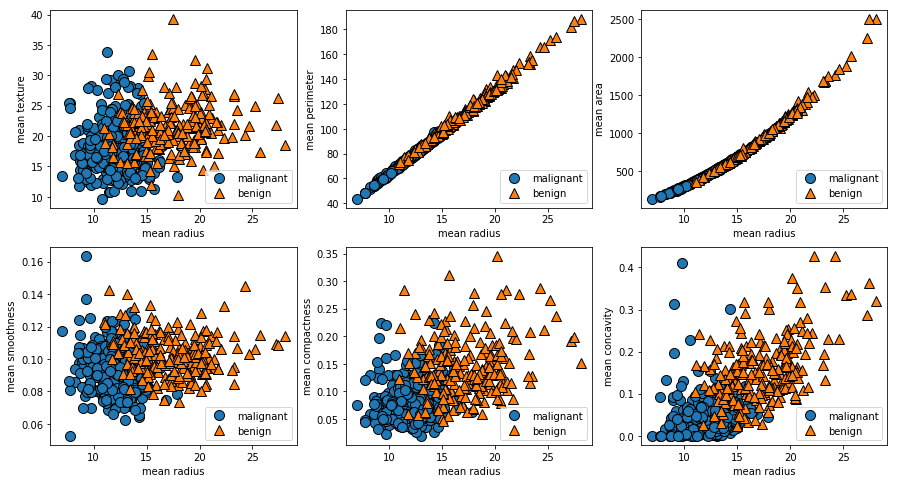

In [181]:
# Data Analyse using Cluster chart for first n features
# subplots(row,column)
fig, axes = plt.subplots(2,3,figsize=(15,8)); #its only provide 3 empty graph
for i in np.arange(0,6):
    row = int(i/3);
    colum = int(i%3);
    mglearn.discrete_scatter(data[:,0],data[:,i+1],target_names[cancer.target],ax=axes[row,colum]);
    axes[row,colum].legend(target_names,loc=4);
    axes[row,colum].set_xlabel(feature_names[0]);
    axes[row,colum].set_ylabel(feature_names[i+1]);

#Data analyse results that mean radius > 20 is always result malignant

## Split test and train data

In [39]:
trainX,testX,trainy,testy = train_test_split(data,cancer['target'],random_state=5);
print("Data shape : {}".format(data.shape));
print("Train Data shape : {}".format(trainX.shape));
print("Test Data shape : {}".format(testX.shape));

Data shape : (569, 30)
Train Data shape : (426, 30)
Test Data shape : (143, 30)


## Creating classifier

## KNN use euclidean distance b/w neighbour and find fit class

In [186]:
classifier = KNeighborsClassifier(n_neighbors=5).fit(trainX,trainy);
predictedy = classifier.predict(testX);
print("Classification score : {}".format(classifier.score(testX,testy)));
np.mean(classifier.predict(testX) == predictedy);

row_count = 40;
predictDF = pd.DataFrame(testX[:row_count,:6],columns=feature_names[:6]);
predictDF['actual']= target_names[testy][:row_count];
predictDF['predicted']= target_names[predictedy][:row_count];
predictDF.style.hide_index()


Classification score : 0.951048951048951


mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,actual,predicted
15.3,25.27,102.4,732.4,0.1082,0.1697,malignant,malignant
12.34,22.22,79.85,464.5,0.1012,0.1015,benign,benign
14.5,10.89,94.28,640.7,0.1101,0.1099,benign,benign
13.3,21.57,85.24,546.1,0.08582,0.06373,benign,benign
10.82,24.21,68.89,361.6,0.08192,0.06602,benign,benign
23.51,24.27,155.1,1747,0.1069,0.1283,malignant,malignant
11.94,20.76,77.87,441,0.08605,0.1011,benign,benign
11.14,14.07,71.24,384.6,0.07274,0.06064,benign,benign
14.69,13.98,98.22,656.1,0.1031,0.1836,benign,benign
13.37,16.39,86.1,553.5,0.07115,0.07325,benign,benign


## Mismatch rows 

In [157]:
predictDF.loc[predictDF.actual != predictDF.predicted]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,actual,predicted
20,16.25,19.51,109.80,815.8,0.10260,0.1893,malignant,benign
32,14.42,19.77,94.48,642.5,0.09752,0.1141,malignant,benign


## Highlight mismatch rows

In [213]:
def highlightMismatch(row):
    if(row.actual != row.predicted):
        returnValue =  ['background-color: red' for i in np.arange(0,row.size)];
    else:
        returnValue =  ['background-color: white' for i in np.arange(0,row.size)];
    return returnValue;
#axis 1 for row default is column
predictDF.iloc[10:40,:].style.apply(highlightMismatch,axis=1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,actual,predicted
10,13.21,28.06,84.88,538.4,0.08671,0.06877,benign,benign
11,11.69,24.44,76.37,406.4,0.1236,0.1552,benign,benign
12,20.6,29.33,140.1,1265,0.1178,0.277,malignant,malignant
13,10.29,27.61,65.67,321.4,0.0903,0.07658,benign,benign
14,14.81,14.7,94.66,680.7,0.08472,0.05016,benign,benign
15,11.25,14.78,71.38,390,0.08306,0.04458,benign,benign
16,9.029,17.33,58.79,250.5,0.1066,0.1413,benign,benign
17,12.3,15.9,78.83,463.7,0.0808,0.07253,benign,benign
18,9.423,27.88,59.26,271.3,0.08123,0.04971,benign,benign
19,12.87,19.54,82.67,509.2,0.09136,0.07883,benign,benign


## n_neigbhour value selection

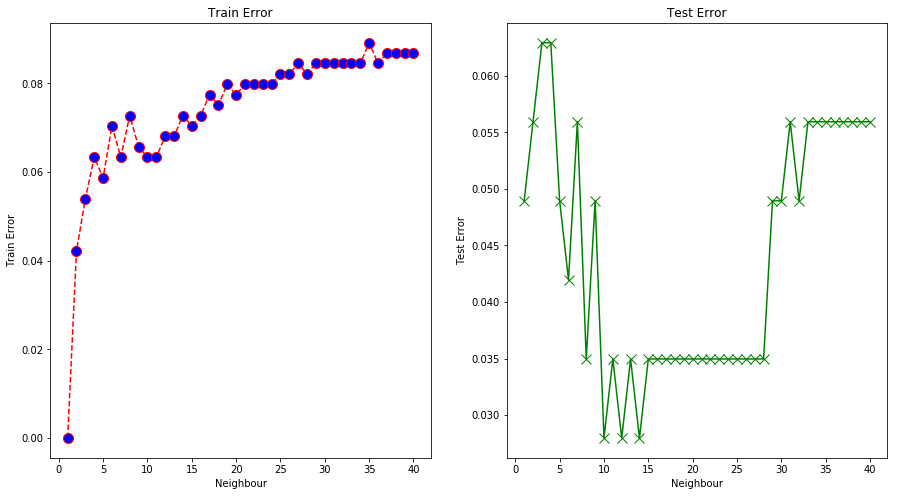

In [250]:
error ={'n':[],'etrain':[],'etest':[]}
for i in np.arange(1,41):
    classifier = KNeighborsClassifier(n_neighbors=i).fit(trainX,trainy);
    error['n'].append(i);
    error['etest'].append(1 - classifier.score(testX,testy));
    error['etrain'].append(1 - classifier.score(trainX,trainy));
    
fig, echart = plt.subplots(1,2,figsize=(15,8));
echart[0].plot(error['n'],error['etrain'],color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10);
echart[0].set_xlabel("Neighbour");
echart[0].set_ylabel("Train Error");
echart[0].set_title("Train Error");

echart[1].plot(error['n'],error['etest'],color='green', linestyle='solid', marker='x',  
         markerfacecolor='yellow', markersize=10);
echart[1].set_xlabel("Neighbour");
echart[1].set_ylabel("Test Error");
echart[1].set_title("Test Error");

# neigbour 1 is overfitting value
# neigbour value b/w 15 to 30 is give generlize solution
#30 onward underfitting

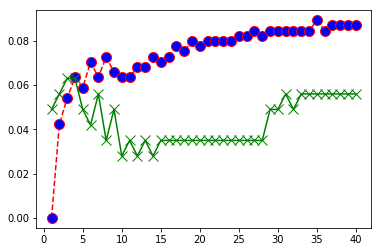

In [249]:
plt.plot(error['n'],error['etrain'],color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10);
plt.plot(error['n'],error['etest'],color='green', linestyle='solid', marker='x',  
         markerfacecolor='yellow', markersize=10);

## KNN Regressor

In [193]:
from sklearn.neighbors import KNeighborsRegressor;
reg = KNeighborsRegressor(n_neighbors=3).fit(trainX,trainy);
reg.score(testX,testy);

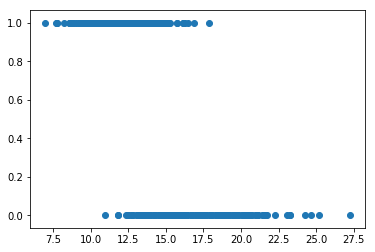

In [211]:
#cancer data well suited for clustering not for regression
plt.plot(trainX[:,0],trainy);
#plt.plot(testX[:,0],testy,"x");